In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [2]:
wine = pd.read_csv('winequality-white[1].csv',sep=';')

In [3]:
wine['quality'].min()

3

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [5]:
wineT = wine

In [6]:
wineT['qualityDummy'] = 0

In [7]:
wineT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityDummy
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,0
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,0
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,0
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,0
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6,0
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,0
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,0
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6,0


In [8]:
wineT['alcohol'][0]

8.8

In [9]:
for x in range(len(wineT)):
    if wineT['quality'][x] >= 7:
        wineT['qualityDummy'][x] = 1
#     elif wineT['quality'][x] >=5:
#         wineT['qualityDummy'][x] = 1

C:\Users\Amrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
wineT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityDummy
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,0
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,0
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,0
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,0
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,0
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6,0
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,0
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,0
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6,0


In [11]:
X = wineT[['fixed acidity','pH','alcohol','citric acid', 'residual sugar','density','volatile acidity','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']]
y = wineT['qualityDummy'].values.reshape(-1,1)

In [12]:
X.shape

(4898, 11)

In [13]:
y.shape

(4898, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Using TensorFlow backend.
C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

In [17]:
deep_model = Sequential()
deep_model.add(Dense(units=60, activation='relu', input_dim=11))
deep_model.add(Dense(units=60, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 122       
Total params: 4,502
Trainable params: 4,502
Non-trainable params: 0
_________________________________________________________________


In [19]:
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 0s - loss: 0.4536 - acc: 0.7904
Epoch 2/200
 - 0s - loss: 0.3874 - acc: 0.8176
Epoch 3/200
 - 0s - loss: 0.3727 - acc: 0.8214
Epoch 4/200
 - 0s - loss: 0.3650 - acc: 0.8293
Epoch 5/200
 - 0s - loss: 0.3577 - acc: 0.8271
Epoch 6/200
 - 0s - loss: 0.3526 - acc: 0.8323
Epoch 7/200
 - 0s - loss: 0.3472 - acc: 0.8326
Epoch 8/200
 - 0s - loss: 0.3444 - acc: 0.8328
Epoch 9/200
 - 0s - loss: 0.3389 - acc: 0.8345
Epoch 10/200
 - 0s - loss: 0.3324 - acc: 0.8415
Epoch 11/200
 - 0s - loss: 0.3294 - acc: 0.8432
Epoch 12/200
 - 0s - loss: 0.3249 - acc: 0.8459
Epoch 13/200
 - 0s - loss: 0.3214 - acc: 0.8500
Epoch 14/200
 - 0s - loss: 0.3154 - acc: 0.8530
Epoch 15/200
 - 0s - loss: 0.3109 - acc: 0.8554
Epoch 16/200
 - 0s - loss: 0.3081 - acc: 0.8560
Epoch 17/200
 - 0s - loss: 0.3035 - acc: 0.8595
Epoch 18/200
 - 0s - loss: 0.3010 - acc: 0.8606
Epoch 19/200
 - 0s - loss: 0.2951 - acc: 0.8622
Epoch 20/200
 - 0s - loss: 0.2938 - acc: 0.8620
E

Epoch 166/200
 - 0s - loss: 0.0386 - acc: 0.9902
Epoch 167/200
 - 0s - loss: 0.0458 - acc: 0.9883
Epoch 168/200
 - 0s - loss: 0.0388 - acc: 0.9907
Epoch 169/200
 - 0s - loss: 0.0357 - acc: 0.9907
Epoch 170/200
 - 0s - loss: 0.0360 - acc: 0.9924
Epoch 171/200
 - 0s - loss: 0.0341 - acc: 0.9948
Epoch 172/200
 - 0s - loss: 0.0331 - acc: 0.9935
Epoch 173/200
 - 0s - loss: 0.0306 - acc: 0.9943
Epoch 174/200
 - 0s - loss: 0.0318 - acc: 0.9937
Epoch 175/200
 - 0s - loss: 0.0370 - acc: 0.9921
Epoch 176/200
 - 0s - loss: 0.0367 - acc: 0.9916
Epoch 177/200
 - 0s - loss: 0.0362 - acc: 0.9916
Epoch 178/200
 - 0s - loss: 0.0356 - acc: 0.9926
Epoch 179/200
 - 0s - loss: 0.0295 - acc: 0.9943
Epoch 180/200
 - 0s - loss: 0.0328 - acc: 0.9924
Epoch 181/200
 - 0s - loss: 0.0388 - acc: 0.9905
Epoch 182/200
 - 0s - loss: 0.0345 - acc: 0.9907
Epoch 183/200
 - 0s - loss: 0.0398 - acc: 0.9888
Epoch 184/200
 - 0s - loss: 0.0436 - acc: 0.9858
Epoch 185/200
 - 0s - loss: 0.0333 - acc: 0.9913
Epoch 186/200
 - 0s 

In [20]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.83887824657012, Accuracy: 0.8432653061711058


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_predictions = deep_model.predict_classes(X_test_scaled[5:10])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[5:10])}")

Predicted classes: [0 0 0 0 0]
Actual Labels: [array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]


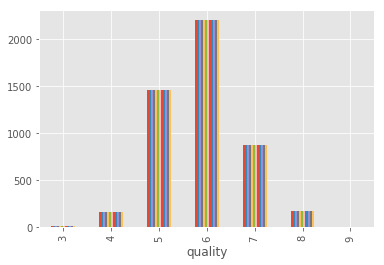

In [23]:
wine.groupby(['quality']).count().plot(kind='bar', legend=False)